## Saving figure source data

Many scientific journals are (for good reason) requiring that authors upload the source data for their figures. For complex analysis pipelines this can be complicated and frustrating. FigureFirst to the rescue!  

This notebook demonstrates how you can use FigureFirst to save the source data for your figures automatically. Source data here means the data, function calls, and the arguments to those functions. 

With the FigureFirst formatted source data in hand, you can easily rebuild the figure, or output the data to a human readable CSV (Markdown) file.

In [1]:
import numpy as np
import figurefirst as fifi
from IPython.display import display,SVG,Markdown

In [2]:
layout = fifi.FigureLayout('figure_template.svg', hide_layers=['template'])
layout.make_mplfigures(hide=True)

### Clear out the data for all the figures and axes

In [3]:
for key, axis in layout.axes.items():
    print key
    # note, you can use the data filename, or the layout filename (as long as you use the defaults)
    fifi.regenerate.clear_fifidata('figure_template.svg', key)

(u'figure_1', u'axis_a')
Automatically finding data file: figure_template_data.dillpickle
Automatically finding data file: figure_template_data.dillpickle
(u'figure_2', u'axis_a')
Automatically finding data file: figure_template_data.dillpickle
Automatically finding data file: figure_template_data.dillpickle
(u'figure_1', u'axis_b')
Automatically finding data file: figure_template_data.dillpickle
Automatically finding data file: figure_template_data.dillpickle


### Use matplotlib to plot some data on figure_1 axis_a

In [4]:
ax = layout.axes[('figure_1', 'axis_a')]

# make some fake data
x = np.linspace(0,10,100)
y = np.sin(x)

# call matplotlib's plot function with the figurefirst wrapper, which saves the data
ax._plot(['Sine wave', 'Time', 'Response'], x, y, color='blue')

### Use some functions in figurefirst.mpl_functions on figure_1 axis_b

In [5]:
ax = layout.axes[('figure_1', 'axis_b')]

# use figurefirst wrapper for adding a patch
# note: matplotlib function add_artist does not work in regeneration step (artists cannot be pickled)   
ax._add_mpl_patch(['This is a rectangle'], 'Rectangle', (3, 0), 1.5, 1, fill=False, color='red', linewidth=1)

# Generally we recommend using '_' notation, and including a title and description of the arguments
# However, for quick formatting calls, there is a faster notation. This does not work with custom functions. 

# First set record to True
ax.record = True

# Then make your function calls as usual
# matplotlib functions
ax.set_xlim(0,5)
ax.set_ylim(-1,1)

# figurefirst.mpl_functions
ax.adjust_spines(['left', 'bottom']) 
ax.set_fontsize(6)

### Use a pickle-able user defined plotting function on figure_2 axis_a

In [6]:
ax = layout.axes[('figure_2', 'axis_a')]

def foo(ax, x, list_of_noisy_ys, color='green'):
    mean_y = np.mean(list_of_noisy_ys, axis=0)
    ax.plot(x, mean_y, color=color, linewidth=3)
    for y in list_of_noisy_ys:
        ax.plot(x, y, color=color, linewidth=1, alpha=0.2)

# save a custom plotting function in the data file
list_of_noisy_ys = []
for i in range(6):
    noisy_y = y + np.random.uniform(-0.5, 0.5, len(y))
    list_of_noisy_ys.append(noisy_y)
ax._custom(['Plot line and dots', 'Time', 'List of y values'], foo, x, list_of_noisy_ys, color='magenta') 

### Use a custom function from another package:
##### ax._custom(['Title', 'Arg description], 'package.module.function', *args, **kwargs)

### Save figures to layout and write svg

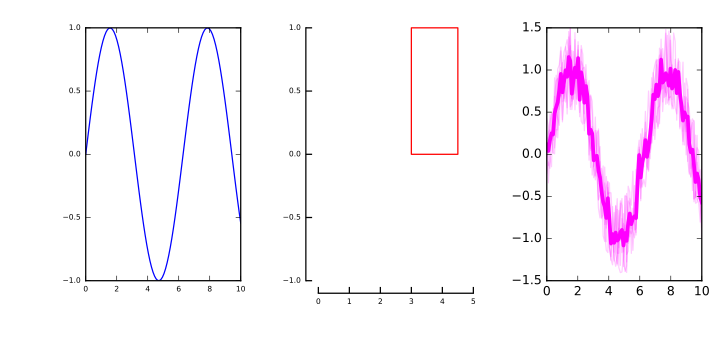

In [7]:
layout.append_figure_to_layer(layout.figures['figure_1'], 'figure_1', cleartarget=True)
layout.append_figure_to_layer(layout.figures['figure_2'], 'figure_2', cleartarget=True)
svg = 'figure_output.svg'
layout.write_svg(svg)
SVG(svg)

### Regenerate the figure from the saved data

In [8]:
fifi.regenerate.replot('figure_template.svg', output_filename='new_figure_output.svg')

Skipping figure: none


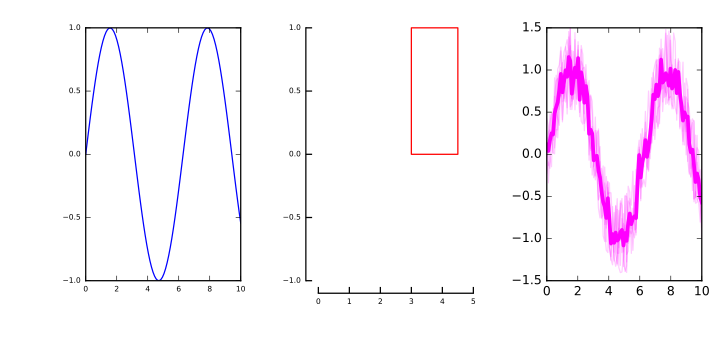

In [9]:
svg = 'new_figure_output.svg'
layout.set_layer_visibility('Layer 1',False)
layout.write_svg(svg)
SVG(svg)

### Take a look at the data file

In [10]:
data = fifi.regenerate.load_data_file('figure_template.svg') # you can either use the layout or data filename

Automatically finding data file: figure_template_data.dillpickle


#### Here are all the plotting actions, data, and settings called for figure_1 axis_a

In [11]:
data[('figure_1', 'axis_a')]

[{'args': (array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
           0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
           1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
           1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
           2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
           2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
           3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
           3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
           4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
           4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
           5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
           5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
           6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
           6.5656

### If you need a more standard and human readable format, you can convert the data file into a markdown / csv file

Only data that has argument descriptions associated with it will be saved. This prevents clogging the file with tick marks, etc. The titles and descriptions are drawn from the data file, so use descriptive titles when writing the code!

Because we did not provide descriptions for the arguments to the rectangle call, it's data is not saved. 

In [12]:
# This is optional, but helps to connect the data in the markdown / csv file to the actual panel names you have
# If left blank (None), the Panel names will just be the layout_keys reformatted, e.g. 'figure_1_axis_b')
panel_id_to_layout_keys = {'a': [('figure_1', 'axis_a'), ('figure_1', 'axis_b')],
                           'b': [('figure_2', 'axis_a')]}

# Define a figure number
figure_number = 1

# Header, optional
header = '# This file contains the data needed for generating figure 1\n### FigureFirst example by Floris van Breugel'

In [13]:
fifi.regenerate.write_to_csv('figure_template_data.dillpickle', figure_number, \
                             panel_id_to_layout_keys, header=header)

In [14]:
# Take a look at the file. If you need a ".csv" file, just change the extension. 
# Markdown files can be displayed nicely in Chrome: 
#      https://stackoverflow.com/questions/9843609/view-markdown-files-offline

with open('figure_template_data_summary.md', 'r') as fh:
    content = fh.read()
display(Markdown(content))

#############################################################################################################################
# This file contains the data needed for generating figure 1
### FigureFirst example by Floris van Breugel
This file was automatically generated from source data using FigureFirst: http://flyranch.github.io/figurefirst/
#############################################################################################################################
# Figure: 1
#############################################################################################################################
## Panel: a
#############################################################################################################################
#### Time
0.0, 0.10101010101, 0.20202020202, 0.30303030303, 0.40404040404, 0.505050505051, 0.606060606061, 0.707070707071, 0.808080808081, 0.909090909091, 1.0101010101, 1.11111111111, 1.21212121212, 1.31313131313, 1.41414141414, 1.51515151515, 1.61616161616, 1.71717171717, 1.81818181818, 1.91919191919, 2.0202020202, 2.12121212121, 2.22222222222, 2.32323232323, 2.42424242424, 2.52525252525, 2.62626262626, 2.72727272727, 2.82828282828, 2.92929292929, 3.0303030303, 3.13131313131, 3.23232323232, 3.33333333333, 3.43434343434, 3.53535353535, 3.63636363636, 3.73737373737, 3.83838383838, 3.93939393939, 4.0404040404, 4.14141414141, 4.24242424242, 4.34343434343, 4.44444444444, 4.54545454545, 4.64646464646, 4.74747474747, 4.84848484848, 4.94949494949, 5.05050505051, 5.15151515152, 5.25252525253, 5.35353535354, 5.45454545455, 5.55555555556, 5.65656565657, 5.75757575758, 5.85858585859, 5.9595959596, 6.06060606061, 6.16161616162, 6.26262626263, 6.36363636364, 6.46464646465, 6.56565656566, 6.66666666667, 6.76767676768, 6.86868686869, 6.9696969697, 7.07070707071, 7.17171717172, 7.27272727273, 7.37373737374, 7.47474747475, 7.57575757576, 7.67676767677, 7.77777777778, 7.87878787879, 7.9797979798, 8.08080808081, 8.18181818182, 8.28282828283, 8.38383838384, 8.48484848485, 8.58585858586, 8.68686868687, 8.78787878788, 8.88888888889, 8.9898989899, 9.09090909091, 9.19191919192, 9.29292929293, 9.39393939394, 9.49494949495, 9.59595959596, 9.69696969697, 9.79797979798, 9.89898989899, 10.0
#### Response
0.0, 0.100838420258, 0.200648856523, 0.298413804448, 0.393136612148, 0.483851640438, 0.569634106909, 0.649609513506, 0.722962561479, 0.788945462844, 0.846885563603, 0.89619220103, 0.936362725104, 0.966987622709, 0.98775469236, 0.9984522269, 0.998971171723, 0.989306236514, 0.969555949182, 0.93992165143, 0.900705446203, 0.85230711794, 0.795220057023, 0.730026229976, 0.657390246683, 0.578052585107, 0.492822042589, 0.402567490669, 0.30820901749, 0.210708548077, 0.111060038124, 0.0102793412405, -0.0906061470334, -0.190567962875, -0.28858705872, -0.383664191806, -0.474830110822, -0.561155436815, -0.641760137619, -0.715822499229, -0.782587502654, -0.841374520861, -0.891584257335, -0.932704855532, -0.964317116929, -0.986098774491, -0.997827777979, -0.999384557612, -0.990753243006, -0.972021824959, -0.943381258446, -0.90512351595, -0.857638610988, -0.801410622169, -0.737012758319, -0.665101514979, -0.586409981847, -0.501740369394, -0.411955830831, -0.317971662811, -0.220745974555, -0.121269920537, -0.0205575962873, 0.0803642996703, 0.18046693236, 0.278729818678, 0.374151230571, 0.465758407026, 0.552617470746, 0.633842948449, 0.708606797699, 0.776146848284, 0.835774572052, 0.886882102029, 0.928948429231, 0.961544714027, 0.984338657884, 0.997097890944, 0.999692340886, 0.992095558932, 0.974384989476, 0.946741180583, 0.909445943424, 0.862879479382, 0.80751650414, 0.743921408257, 0.672742503562, 0.594705414024, 0.510605678474, 0.421300640589, 0.327700708813, 0.230760075325, 0.131466988643, 0.0308336790611, -0.0701139604006, -0.170346832328, -0.26884312591, -0.364598733656, -0.456637487634, -0.544021110889
#############################################################################################################################
## Panel: b
#############################################################################################################################
#### Time
0.0, 0.10101010101, 0.20202020202, 0.30303030303, 0.40404040404, 0.505050505051, 0.606060606061, 0.707070707071, 0.808080808081, 0.909090909091, 1.0101010101, 1.11111111111, 1.21212121212, 1.31313131313, 1.41414141414, 1.51515151515, 1.61616161616, 1.71717171717, 1.81818181818, 1.91919191919, 2.0202020202, 2.12121212121, 2.22222222222, 2.32323232323, 2.42424242424, 2.52525252525, 2.62626262626, 2.72727272727, 2.82828282828, 2.92929292929, 3.0303030303, 3.13131313131, 3.23232323232, 3.33333333333, 3.43434343434, 3.53535353535, 3.63636363636, 3.73737373737, 3.83838383838, 3.93939393939, 4.0404040404, 4.14141414141, 4.24242424242, 4.34343434343, 4.44444444444, 4.54545454545, 4.64646464646, 4.74747474747, 4.84848484848, 4.94949494949, 5.05050505051, 5.15151515152, 5.25252525253, 5.35353535354, 5.45454545455, 5.55555555556, 5.65656565657, 5.75757575758, 5.85858585859, 5.9595959596, 6.06060606061, 6.16161616162, 6.26262626263, 6.36363636364, 6.46464646465, 6.56565656566, 6.66666666667, 6.76767676768, 6.86868686869, 6.9696969697, 7.07070707071, 7.17171717172, 7.27272727273, 7.37373737374, 7.47474747475, 7.57575757576, 7.67676767677, 7.77777777778, 7.87878787879, 7.9797979798, 8.08080808081, 8.18181818182, 8.28282828283, 8.38383838384, 8.48484848485, 8.58585858586, 8.68686868687, 8.78787878788, 8.88888888889, 8.9898989899, 9.09090909091, 9.19191919192, 9.29292929293, 9.39393939394, 9.49494949495, 9.59595959596, 9.69696969697, 9.79797979798, 9.89898989899, 10.0
#### List of y values
###### Number: 1
0.419849645867, 0.340958582495, 0.0419866449391, 0.277234464277, 0.0147344550526, 0.0057461669588, 0.937077740235, 0.196164813697, 0.724695460859, 0.693796669084, 1.0715214563, 1.21632945935, 1.27551028706, 1.14262743141, 1.00358140576, 1.28798843582, 0.663711626402, 1.21994707918, 1.04421195045, 1.03020282641, 1.23798013104, 0.676378540009, 1.10397239591, 1.05137693084, 0.279481664007, 0.752069280026, 0.768600721426, 0.874853854503, -0.157532717342, 0.330714055185, -0.142480004642, 0.441340692018, -0.215990975331, 0.300343352777, -0.124029981578, -0.749787512825, -0.720559359515, -0.435403877322, -0.829570877899, -0.321684748196, -1.03860736398, -1.25596456923, -0.620523321008, -1.16071624311, -0.607074465208, -1.31444438365, -0.841342578332, -0.580520406429, -1.16670533334, -0.704598988084, -1.35811233192, -1.40187691965, -0.379321753495, -0.451377525968, -1.17506288791, -0.640679716619, -0.801557686631, -0.929002353336, -0.248998160797, 0.0564361460154, -0.186810270468, -0.175794068661, 0.0500263305178, 0.508731177733, -0.052326654569, -0.0148916996502, -0.0522417305731, 0.38910270934, 0.690954829863, 0.834445810413, 1.06100342137, 0.307172154499, 1.258705618, 1.12849541699, 0.507143336029, 0.783840489805, 1.43627880931, 0.85313931676, 0.643238905191, 0.686900636014, 0.538205130273, 0.741177430846, 0.554624148161, 0.479752812116, 0.851845945896, 0.960356768248, 0.440081951087, 0.153253993564, 0.344002222927, 0.680624699765, 0.638758462944, -0.207577621191, -0.262384140158, 0.024956956748, -0.563192640232, -0.440424287986, -0.53330952464, -0.567501522298, -0.804439307249, -0.26982846062
###### Number: 2
-0.227707994605, -0.0913965795496, -0.167076055418, 0.488017627838, 0.456016443859, 0.0756803993913, 0.294550229638, 0.28970782978, 0.98125014351, 0.681174746701, 1.08662207669, 0.631898009635, 0.811901787797, 0.551685641105, 0.918978186385, 1.49240099463, 0.629653725316, 0.668180480059, 1.35963555414, 0.594211009663, 1.33504266791, 0.784678585268, 0.391861687362, 0.358250366544, 0.838313905954, 0.856297043849, 0.647682390813, -0.00732648693356, 0.690552276493, 0.462022860642, -0.146325629913, -0.257291074492, 0.279953491924, -0.00416645518278, 0.0909115365221, -0.763814081591, -0.532246835653, -0.15196215493, -0.875693881428, -0.392493647682, -0.590154363989, -1.08620654664, -0.943622068082, -0.691803828063, -1.18392111526, -1.29822403271, -0.878630935982, -1.31759012542, -0.764315918962, -1.33115640421, -0.499933526135, -1.27682964838, -0.861113560548, -0.979524269053, -0.69626592137, -1.13957390714, -0.775919060691, -0.181336191481, -0.698866808404, 0.0139794607942, -0.526595426225, 0.302977161772, -0.0144039826731, 0.380961019465, 0.036198364599, -0.200526283799, 0.441225372818, 0.908212658064, 0.714042279623, 0.17630836776, 0.453994917861, 0.326711977279, 0.4342096005, 1.36548454485, 0.622075337211, 1.11278799043, 1.48018537759, 0.972546908262, 0.587053735368, 0.848283567355, 0.59219318118, 0.540049322679, 1.00580965561, 0.839834774235, 1.11871516078, 1.08944646872, 0.453619244797, 0.112279068061, 0.684427802078, 0.518873300324, -0.0568307602971, -0.234875237237, 0.282769503082, 0.375447174876, -0.53391974984, -0.499802392325, -0.0941479053161, -0.236328263587, -0.1807107998, -0.402254369279
###### Number: 3
0.176299800845, -0.132211057021, 0.476117219064, 0.228876816103, 0.0198239672995, 0.906514496357, 0.530591824522, 0.42496298979, 0.344374619945, 1.03183430433, 0.384955520404, 0.796567032751, 1.27702427256, 1.35966861641, 1.23548483467, 0.53194129792, 1.22920560159, 0.652289826398, 1.06977520546, 1.04742038119, 1.08013202997, 0.445992845494, 1.24492397835, 0.956337016537, 0.481250929098, 0.887555262682, 0.812034146445, -0.0697073064997, 0.703013276441, 0.627454031347, 0.134076418493, -0.0900814093961, -0.194139836784, -0.641465793674, -0.755024852044, -0.265642661644, -0.595088228103, -0.340598084083, -1.03692513709, -0.44879322844, -1.10684841392, -1.21353890103, -1.02576653295, -0.920689685033, -0.615780876541, -1.17327342531, -1.17342733259, -0.552465005937, -0.606993764784, -1.15773301501, -0.839865880944, -1.18739362763, -1.15013016279, -0.908021275272, -0.942268283373, -0.860685283922, -0.371969408412, -0.958159052664, -0.0192925562904, -0.0343440955612, -0.400037954891, -0.34271361966, 0.197917694115, 0.0418358207454, -0.181949906456, -0.016041289971, 0.300444517818, 0.126861870852, 0.683293545536, 0.305869689131, 0.834208000841, 1.0763957449, 1.17723845116, 1.07654980219, 1.25428892908, 0.970602737001, 0.684524253184, 0.743650373408, 0.842280041706, 1.4054195905, 0.647636083355, 1.43879272462, 1.34022031412, 0.405530807469, 1.13640123597, 0.324399272398, 0.655223420433, 0.273943561837, 0.844814399567, -0.00667596891319, 0.612247340331, 0.54405075634, 0.153998646804, 0.420970788549, 0.384796443934, -0.580118349449, -0.571141916805, -0.295572699745, -0.48992080276, -0.146197909941
###### Number: 4
-0.0194114965335, 0.259024059007, 0.290556189182, 0.165666053027, 0.210010282564, 0.686724815456, 0.518663131423, 1.01135610555, 1.06272740469, 1.27231009595, 0.833820190456, 0.664128343988, 0.824546045292, 1.22778022298, 0.917783922332, 1.49392919262, 0.531546406604, 0.719377239347, 1.44228714899, 0.656162413494, 1.05336550574, 0.82358685148, 1.29008621021, 1.18493525545, 0.676458136474, 1.06245055857, 0.709151841858, 0.274698500096, 0.399502024901, -0.24623294241, -0.104385726084, 0.282563480868, -0.0368420712792, -0.53505076145, -0.0871780152686, -0.346849738302, -0.967411166523, -1.03425037253, -0.264252895791, -0.472746590026, -0.457020766077, -0.457717340313, -0.793574649502, -1.23194377106, -1.3283964847, -1.1770452975, -0.668636226099, -1.02748955139, -0.925087339005, -0.8214772452, -1.02554375208, -0.465140456595, -0.874323335351, -0.52202323228, -0.603493875099, -0.202248903017, -0.89781099697, -0.885419819962, 0.0103103491723, 0.166937679137, -0.551193625453, 0.0114328828795, 0.168324944859, 0.260465188857, -0.139090873516, -0.183381635482, 0.358152407241, 0.776845962805, 0.221707420654, 0.797507558409, 0.381768052178, 0.554877618871, 0.570408552478, 0.790930180963, 0.869138163433, 0.672970593234, 0.845001376205, 0.606210202703, 0.675613030455, 1.35318836095, 0.883252556867, 0.77587352213, 0.958991759718, 0.962883260745, 0.859862662325, 0.301826664253, 0.728156078166, 1.09306848334, 0.111174388032, 0.90079508878, 0.807066878391, 0.179554183061, 0.407617610996, -0.429179694001, 0.400231825051, -0.511871042514, 0.224161714069, -0.532162461918, -0.433322902168, -0.761440554989
###### Number: 5
0.171478377636, -0.338899084135, -0.0124285730767, -0.147297973698, 0.543081910559, 0.526675947218, 0.206214073348, 0.883855836527, 0.964242125046, 1.22525438946, 0.623640160654, 1.11737679659, 0.620061109686, 0.75814124304, 1.45604563102, 1.2721200292, 0.655671740369, 1.02308056248, 0.527505622414, 1.09628136617, 0.849552855756, 0.496443744354, 0.957287971858, 1.02102566392, 1.03266548106, 0.861366394516, 0.529047889997, 0.18199312612, 0.0466951912198, 0.0601043955398, 0.106448797241, -0.303116182441, -0.188946807169, -0.544808865443, -0.465486716696, -0.166661908588, -0.440702374779, -0.833799480227, -0.387189731641, -0.32734668091, -1.09973046771, -1.24606899221, -1.31091540853, -1.027724474, -0.784935858773, -0.52688396166, -1.34243315959, -1.40388237867, -1.39635958565, -1.21890481102, -0.487148445647, -0.503440639484, -1.0567638156, -0.76530798264, -0.880890828987, -0.789389379918, -0.572465511014, -0.780196129955, -0.454958897327, -0.343573849282, 0.241747686, -0.000831237131362, -0.14985675869, 0.200733665185, 0.281098462154, 0.750390820838, 0.349876979542, 0.139517374426, 0.967539706254, 0.752952646536, 1.10390160967, 1.12373572923, 0.852124358152, 1.13632789368, 1.07156706419, 0.875050900316, 0.730936435377, 0.925759197138, 1.4606544373, 1.12687050024, 0.959782684002, 0.746088778179, 1.12671303614, 0.823408483554, 0.805398762401, 0.838755175814, 0.562194084134, 0.385011794033, 0.570627325887, 0.276446527156, -0.0843347711285, 0.20577647032, -0.273709085637, 0.0338503211704, 0.0687867278812, -0.169011018084, 0.0770113227767, 0.0421852363145, -0.599564085027, -0.86340910792
###### Number: 6
0.184706374092, 0.196038676629, 0.381315870618, 0.48096810819, 0.166607545126, 0.719629589437, 0.873112722553, 0.899796495164, 0.533569615558, 0.816555316912, 0.409011881931, 0.732550668706, 1.17432134158, 0.478361432877, 1.39130825812, 0.563341174825, 0.60125228504, 0.951288277319, 0.72458200012, 1.07096334543, 1.29153766616, 0.652143477334, 0.844684633031, 0.640964667382, 0.365266200105, 0.437629996064, 0.645963046178, 0.20665014547, 0.0708919950342, 0.235580057545, -0.277459779983, -0.221061410634, 0.247533021282, 0.27932962374, -0.326390162633, -0.375740925359, -0.138648935454, -0.933177792643, -1.13771563382, -1.16556767232, -0.338936561356, -1.08596184695, -0.985866287462, -1.26633009574, -1.054332963, -0.654516964666, -1.10630835469, -0.660176861498, -0.525117124896, -1.25600049803, -1.39047147738, -1.32491106085, -0.553776075793, -0.588959590559, -0.675461658988, -0.913704199867, -0.990543089879, -0.80504173318, -0.566519194942, 0.0838477470169, -0.227148657285, -0.388712305362, -0.300626898839, -0.384532626331, -0.121686828367, 0.116845244288, 0.022778312244, 0.153698293654, 0.962586484472, 1.05852452674, 1.1265384821, 0.750594161182, 0.362275549299, 1.24127039151, 0.779164886126, 0.831558654601, 0.593889822567, 1.41085249262, 0.675291795406, 0.677010172497, 1.06046008675, 0.714715956022, 1.01458726394, 0.839899819187, 1.09137210231, 0.855780683917, 0.653155178278, 0.386191225922, 0.428508122196, 0.26871747906, 0.771531878072, 0.238387828719, -0.167319172513, -0.0964676861999, -0.525259880656, 0.226713073208, -0.46933718455, -0.250607395943, -0.540429612166, -0.981497877027
#############################################################################################################################
